In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [3]:
from pprint import pprint
import numpy as np
import descarteslabs as dl

from src.ReMasFrame import *

In [4]:
nasa_df = ReMasFrame()

# Choose an idx --> a landslide (or filter the geodataframe :D)
idx_test = 11031

# changes Point to Polygon
# nasa_df_polygon = nasa_df.create_box(8000000)

# Returns products that we use as a dict
products = nasa_df.get_products()

/home/step/miniconda3/envs/projectx/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [ ]:
pprint(products['weather']['chirps'])

In [6]:
def get_scenes(product, buffer_size, res):
    # Returns start and end date of a 4 day interval
    start_date, end_date = nasa_df.date_interval(nasa_df.event_date[idx_test], delta=10)
    
    scenes, ctx = ReMasFrame.search_scenes(
        nasa_df['geometry'][idx_test].buffer(buffer_size).envelope, 
        product['id'], 
        start_date=start_date, 
        end_date=end_date, 
        limit=10
    )
    
    new_ctx = ctx.assign(resolution=res)
    
    return scenes, new_ctx

def get_composite(product, buffer_size, res):
    
    scenes, new_ctx = get_scenes(product, buffer_size, res)
    
    arr_stack = scenes.stack(product['bands'], new_ctx)
    composite = np.ma.median(arr_stack, axis=0)
    
    return (scenes, new_ctx), composite

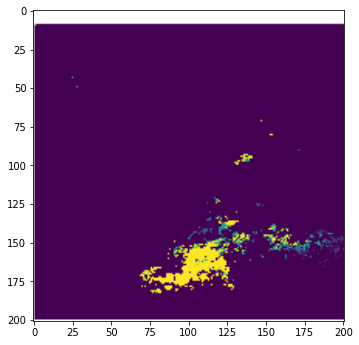

In [7]:
(scenes, ctx), composite = get_composite(products['weather']['chirps'], buffer_size=10, res=0.1)
dl.scenes.display(composite, colormap='viridis', size=5)

In [ ]:
# Choose CHIRPS Daily Precip and correct res
possible_reses = np.linspace(0.01, 1, 50)

for res in possible_reses:
    (scenes, ctx), composite = get_composite(products['weather']['chirps'], buffer_size=10, res=res)
    shape = scenes[-1].ndarray(products['weather']['chirps']['bands'], ctx).shape
    
    print(f"Shape using resolution {res:<20}: {shape}")

Shape using resolution 0.01                : (1, 2001, 2001)
Shape using resolution 0.030204081632653063: (1, 663, 663)
Shape using resolution 0.05040816326530612 : (1, 398, 397)
Shape using resolution 0.07061224489795918 : (1, 284, 285)
Shape using resolution 0.09081632653061224 : (1, 221, 222)
Shape using resolution 0.11102040816326529 : (1, 181, 181)
Shape using resolution 0.13122448979591836 : (1, 153, 154)
Shape using resolution 0.15142857142857144 : (1, 134, 133)
Shape using resolution 0.1716326530612245  : (1, 118, 118)
Shape using resolution 0.19183673469387755 : (1, 105, 106)
Shape using resolution 0.2120408163265306  : (1, 95, 95)
Shape using resolution 0.23224489795918368 : (1, 88, 87)
Shape using resolution 0.2524489795918367  : (1, 80, 80)
Shape using resolution 0.2726530612244898  : (1, 74, 75)
Shape using resolution 0.29285714285714287 : (1, 69, 70)
Shape using resolution 0.3130612244897959  : (1, 65, 65)
Shape using resolution 0.333265306122449   : (1, 61, 61)
Shape usi